# BikewaySim
Use this jupyter notebook to test ideas related to the BikeSim program.

Use Python 3.7


The following thrid-party packages are used in the BikeSim module, need to install those packages before start.
```python
import pandas as pd
import numpy as np
import geopandas as gpd
from shapely.geometry import Point

import networkx as nx

import matplotlib.pyplot as plt
```

# Preparation

Import useful modules/packages for this notebook.

Auto-load external packages (BikeSim) for debugging/interaction.

In [1]:
import os

import numpy as np
import pandas as pd
import geopandas as gpd

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/%autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2
pd.options.display.max_columns = None  # display all columns

In [2]:
# import BikeSim module
from core_script.getPaths_bikewaySim import *

1. set project's root folder to an environment variable 'PROJ_LIB'
2. construct path for loading two required shapefiles (the node file and the link file)
3. do some exploration; do a little bit data exploration; get a sense of the column it contains, etc.

In [3]:
# need to set this environmental path everytime you moves the project root folder
os.environ['PROJ_LIB'] = '/Users/diyi93/Desktop/gra/BikewaySim'

In [4]:
file_dir = os.path.join(os.environ['PROJ_LIB'], 'ABM2020 203K')

file_name_nodes = os.path.join('2020 nodes with latlon', '2020_nodes_latlon.shp')
file_name_links = os.path.join('2020 links', '2020_links.shp')

df_nodes_raw = gpd.read_file(os.path.join(file_dir, file_name_nodes))
df_links_raw = gpd.read_file(os.path.join(file_dir, file_name_links))

In [5]:
print(df_nodes_raw.columns)
print(df_links_raw.columns)
display(df_nodes_raw.head(2))
display(df_links_raw.sort_values('SPEED_LIMI', ascending=False).iloc[200:202])

Index(['N', 'X', 'Y', 'STATION', 'STAFLAG', 'PNR', 'PNR_MAJOR', 'GEOMETRYSO',
       'lat', 'lon', 'geometry'],
      dtype='object')
Index(['A', 'B', 'SHAPE_LENGT', 'DISTANCE', 'NAME', 'COUNTY', 'FACTYPE',
       'TOLLID', 'LANES', 'LANESEA', 'LANESAM', 'LANESMD', 'LANESPM',
       'LANESEV', 'AUXLANE', 'PROHIBITION', 'TRNDIST', 'TRNTIME', 'FCLASS',
       'MINBUSSPD', 'MAXBUSSPD', 'TWOWAY', 'CNTSTATION', 'DIRAADT00',
       'DIRAADT05', 'DIRAADT08', 'DIRAADT10', 'DIRAWDT00', 'DIRAWDT05',
       'DIRAWDT08', 'DIRAWDT10', 'ATR', 'ATR_DIR', 'HR1', 'HR2', 'HR3', 'HR4',
       'HR5', 'HR6', 'HR7', 'HR8', 'HR9', 'HR10', 'HR11', 'HR12', 'HR13',
       'HR14', 'HR15', 'HR16', 'HR17', 'HR18', 'HR19', 'HR20', 'HR21', 'HR22',
       'HR23', 'HR24', 'CNTFAC', 'FACTOR', 'PSPEED04', 'MEDIAN', 'SHOULDER',
       'CONTROL', 'STRATEGIC', 'ID', 'CMSID', 'SIGNALIMPR', 'SPEED_LIMI',
       'FWYSEG', 'ARTSEG', 'SCREENLINE', 'NOTES', 'CNTFIX', 'HOVMERGE', 'GPID',
       'WEAVEFLAG', 'TMC', 'TMCFLAG', 'TMC

,N,X,Y,STATION,STAFLAG,PNR,PNR_MAJOR,GEOMETRYSO,lat,lon,geometry
0,1,2.220979e+06,1.483122e+06,None,0,0,0,1,34.076861,-84.416355,POINT (-84.41636 34.07686)
1,2,2.222861e+06,1.479567e+06,None,0,0,0,1,34.067103,-84.410110,POINT (-84.41011 34.06710)


,A,B,SHAPE_LENGT,DISTANCE,NAME,COUNTY,FACTYPE,TOLLID,LANES,LANESEA,LANESAM,LANESMD,LANESPM,LANESEV,AUXLANE,PROHIBITION,TRNDIST,TRNTIME,FCLASS,MINBUSSPD,MAXBUSSPD,TWOWAY,CNTSTATION,DIRAADT00,DIRAADT05,DIRAADT08,DIRAADT10,DIRAWDT00,DIRAWDT05,DIRAWDT08,DIRAWDT10,ATR,ATR_DIR,HR1,HR2,HR3,HR4,HR5,HR6,HR7,HR8,HR9,HR10,HR11,HR12,HR13,HR14,HR15,HR16,HR17,HR18,HR19,HR20,HR21,HR22,HR23,HR24,CNTFAC,FACTOR,PSPEED04,MEDIAN,SHOULDER,CONTROL,STRATEGIC,ID,CMSID,SIGNALIMPR,SPEED_LIMI,FWYSEG,ARTSEG,SCREENLINE,NOTES,CNTFIX,HOVMERGE,GPID,WEAVEFLAG,TMC,TMCFLAG,TMCDIST,EAOBS,AMOBS,MDOBS,PMOBS,EVOBS,EATIME,AMTIME,MDTIME,PMTIME,EVTIME,EASPD,AMSPD,MDSPD,PMSPD,EVSPD,RAMPFLAG,GEOMETRYSOU,geometry
48366,49763,49248,1526.39941,0.28909,US 411,15,3,0,2,0,0,0,0,0,0,0,0.0,0.0,14,0,0,1,0,0,0,0,0,0,0,0,0,0,None,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,D,None,U,0,None,None,0,65,0,0,0,None,0,0,0,0,101N06937,1,1.13225,123,474,652,350,296,71.303,72.511,72.224,71.303,71.303,57.16601,56.21389,56.43698,57.16601,57.16601,0,1,"LINESTRING (2089249.462 1535869.551, 2087923.2..."
48775,51893,51898,1448.52222,0.27434,SR 316,13,2,0,2,0,0,0,0,0,0,0,0.0,0.0,2,0,0,1,0,0,0,0,0,0,0,0,0,0,None,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,None,D,None,P,0,None,None,0,65,0,0,0,None,0,0,0,0,101N12938,1,3.66817,288,615,870,628,507,207.128,212.849,214.543,211.748,207.576,63.75469,62.04129,61.55149,62.36369,63.61726,0,1,"LINESTRING (2434512.000 1434982.820, 2433222.9..."


# Let's Run BikeSim!

# Data Preparation
Merge node information into the link dataset. Two left joins are needed since each link has two end nodes. The node columns are renamed to the following naming rules **("A" stands for origin node and "B" stands for end node)**: 
```Python
columns={'N': 'A', 'X': 'Ax', 'Y': 'Ay', 'lat': 'A_lat', 'lon': 'A_lon'}
columns={'N': 'B', 'X': 'Bx', 'Y': 'By', 'lat': 'B_lat', 'lon': 'B_lon'}
```
Output the merged file to is 'data_node_link/abm15_links.shp'

Can do this step everytime you run the program, or you can skip this step by read the "abm15_links.shp" file (see commented try except code) if network doesn't change between two runs. (It only takes a few seconds to merge data on my laptop, so there is actually no efficiency issue)

In [6]:
print('** Initialize bike network **')
# os.environ['PROJ_LIB'] = os.getcwd()  # since the notebook is at main directory
dirPath = os.path.join(os.environ['PROJ_LIB'], 'build_graph')
os.chdir(dirPath)
# try:
#     df_links = gpd.read_file(os.path.join('data_node_link', 'abm15_links.shp'))
# except:
df_links = initialize_abm15_links()
df_links.head(2)

** Initialize bike network **


,A,B,A_B,geometry,SPEED_LIMI,DISTANCE,NAME,Ax,Ay,A_lat,A_lon,Bx,By,B_lat,B_lon,minx_sq,miny_sq,maxx_sq,maxy_sq
0,7501,20489,7501_20489,"LINESTRING (2220324.503 1362191.922, 2220326.2...",35.0,0.13508,Ashby St,2.220325e+06,1.362192e+06,33.74452,-84.41754,2.220326e+06,1.362905e+06,33.74648,-84.41754,89.0,54.0,89.0,55.0
1,7501,20500,7501_20500,"LINESTRING (2220324.503 1362191.922, 2220314.0...",35.0,0.10479,Ashby St,2.220325e+06,1.362192e+06,33.74452,-84.41754,2.220314e+06,1.361639e+06,33.74300,-84.41757,89.0,54.0,89.0,54.0


`dict_settings` are for the settings of all general information before running BikewaySim. This includes the general information like walking speed, walking threshold, etc. **Notice that query time and strategy together *jointly* defines the trip's information**, either by the departure time or by arrival time.

For example, for strategy set to 1, given departure time (**`query_time`**) is 7:30 and the estimated travel time by the program is 40 minutes, one can calculate the arrival time as 8:10. The same travel plan used for strategy 2 would be: given arrival time (**`query_time`**) at 10:00, the departure time should be 9:20.

The code block below is: **Given departure time from origin, solve earliest arrival time**. The opposite strategy is run in later part of this notebook.

In [7]:
# build networkx graph takes less than two minutes
print('** build bikeway network **')
dict_bike = {'DG': build_bike_network(df_links), 'links': df_links}

** build bikeway network **


Either set query time and strategies directly in the ```dict_settings```, or read data files of those settings to apply different strategies in the same run. 

In [8]:
# combine all settings
dict_settings = {}

# strategy: 1. given origin time find earliest arrival
#           2. given expected arrival time find latest departure time
dict_settings = {'walk_speed': 2.0,  # people's walking speed 2 mph
                 'grid_size': 25000.0,  # for searching nearby links by grouping links to grids with width 25000 ft. for efficiency in searching
                 'ntp_dist_thresh': 5280.0,  # node to point (maximum distance access to network from origin/destination); (walking) distance threshold
                 'network': {'bike': dict_bike},  # dump in networks and modes
                 # strategy determines network link's direction.
                 # Strategy 1: Find earliest arrival given query time as departure time
                 # Strategy 2: Find latest departure time given query time as arrival time
                 'strategy': {'bike': 1},  # 1. find earliest arrival 2. find latest departure
                 'query_time': [8],  # departure time or arrival time of a trip, depends on the strategy
                 
                 'walk_thresh': {'bike': 1},  # walking threshold is 1 mile
                 'num_options': {'bike': 1},  # if set to 2, return 2-shortest paths
                 'plot_all': True,  # if True, plot results and save plots for all routes found
                 'one_by_one': False  # set time and strategy one by one
                 }

Load data. If contains temporal information.

In [9]:
print('** load trip data & prepare sample **')
sample_Prepared = False  # check prepared process
options = ['bike']

df_points = pd.DataFrame()
# Section 2: lOAD SAMPLE DATA; could have multiple csv sample files.
if dict_settings['one_by_one'] is False:
    if sample_Prepared:
        for samp_file in glob.glob(os.path.join('samples_out', '*.csv')):
            dfi = pd.read_csv(samp_file)
            dfi['sample'] = os.path.basename(samp_file).split('.csv')[0]
            df_points = df_points.append(dfi, ignore_index=True)
    else:
        for samp_file in glob.glob(os.path.join('samples_in', '*.csv')):
            df_points = df_points.append(samp_pre_process(samp_file, dict_settings), ignore_index=True)
else:
    if sample_Prepared:
        for samp_file in glob.glob(os.path.join('one_by_one_out', '*.csv')):
            dfi = pd.read_csv(samp_file)
            dfi['sample'] = os.path.basename(samp_file).split('.csv')[0]
            df_points = df_points.append(dfi, ignore_index=True)
    else:
        for samp_file in glob.glob(os.path.join('one_by_one_in', '*.csv')):
            df_points = df_points.append(samp_pre_process(samp_file, dict_settings), ignore_index=True)

** load trip data & prepare sample **


In [10]:
display(df_points)

,trip_id,ori_lat,ori_lon,dest_lat,dest_lon,geometry,ox,oy,ox_sq,oy_sq,o_node,o_t,o_d,dx,dy,dx_sq,dy_sq,d_node,d_t,d_d
0,4001880_1_1,33.774524,-84.295376,33.757411,-84.352757,POINT (2240025.346 1366840.737),2.257473e+06,1.373041e+06,90.0,55.0,9496,0.013159,0.026318,2.240025e+06,1.366841e+06,90.0,55.0,40102,0.011866,0.023733
1,4004837_1_5,33.774524,-84.295376,33.765113,-84.313054,POINT (2252096.297 1369623.749),2.257473e+06,1.373041e+06,90.0,55.0,9496,0.013159,0.026318,2.252096e+06,1.369624e+06,90.0,55.0,9176,0.016593,0.033185
2,4007534_1_9,33.774524,-84.295376,33.772597,-84.251919,POINT (2270677.321 1372326.223),2.257473e+06,1.373041e+06,90.0,55.0,9496,0.013159,0.026318,2.270677e+06,1.372326e+06,91.0,55.0,9157,0.074155,0.148310
3,grta_pnr,34.098950,-84.644479,33.753409,-84.389415,POINT (2228880.759 1365406.713),2.151941e+06,1.491406e+06,86.0,60.0,65633,0.152274,0.304547,2.228881e+06,1.365407e+06,89.0,55.0,20093,0.003781,0.007561
4,grta,34.077261,-84.656460,33.753409,-84.389415,POINT (2228880.759 1365406.713),2.148276e+06,1.483531e+06,86.0,59.0,82556,0.025473,0.050946,2.228881e+06,1.365407e+06,89.0,55.0,20093,0.003781,0.007561


In [11]:
# # read some links to show the structure of the graph
# bike_net = dict_bike['DG']
# print(bike_net['9495']['64222'])
# print(bike_net['64222']['9315'])

**for each trip, find k-shortest paths**
seq
['9496_9495', '9495_64222', '64222_9315', '9315_78042', '78042_78041', '78041_9396', '9396_9177', '9177_78069', '78069_9176', '9176_78066', '78066_14379', '14379_9175', '9175_65055', '65055_36414', '36414_19568', '19568_28087', '28087_28088', '28088_19617', '19617_78194', '78194_78196', '78196_19597', '19597_74476', '74476_20041']
results_route/200508_180549/4001880_1_1_0.PNG


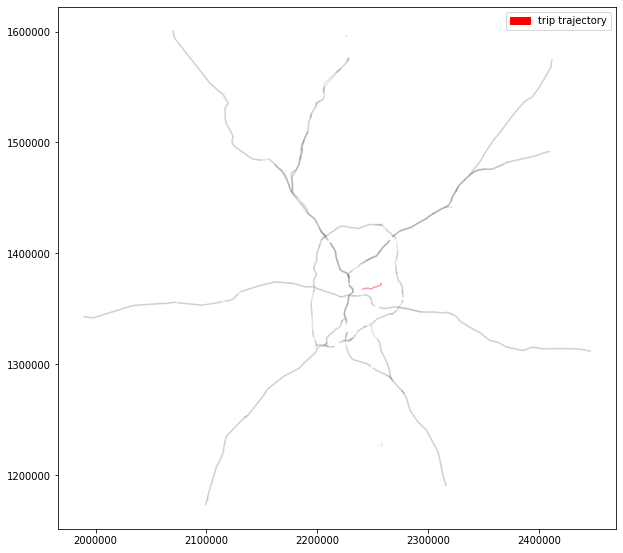

PATH #: 0
['9496', '9495', '64222', '9315', '78042', '78041', '9396', '9177', '78069', '9176', '78066', '14379', '9175', '65055', '36414', '19568', '28087', '28088', '19617', '78194', '78196', '19597', '74476', '20041', '40102']
seq
['9496_9495', '9495_64222', '64222_9315', '9315_78042', '78042_78041', '78041_9396', '9396_9177', '9177_78069']
results_route/200508_180549/4004837_1_5_0.PNG


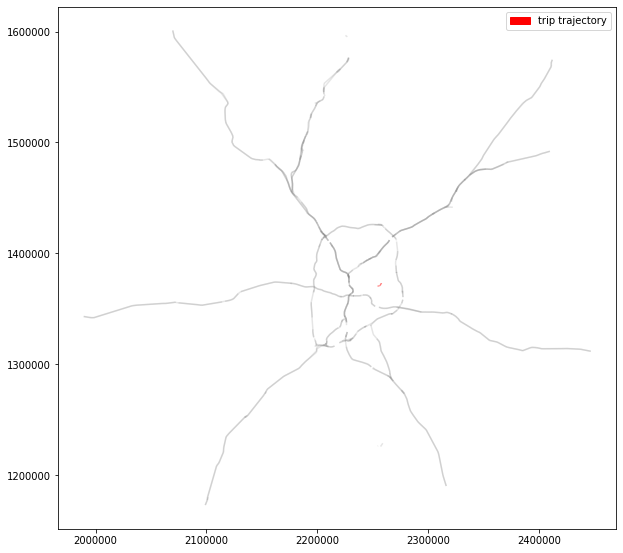

PATH #: 0
['9496', '9495', '64222', '9315', '78042', '78041', '9396', '9177', '78069', '9176']
seq
['9496_9497', '9497_37052', '37052_9393', '9393_9185', '9185_25443', '25443_9186', '9186_82126', '82126_9193', '9193_9330', '9330_25442', '25442_14922', '14922_78027', '78027_78028', '78028_9331', '9331_81911', '81911_9332', '9332_9333', '9333_9334', '9334_9335']
results_route/200508_180549/4007534_1_9_0.PNG


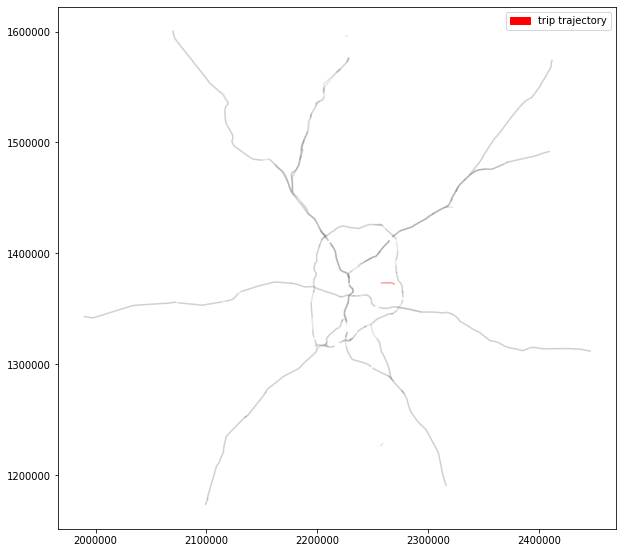

PATH #: 0
['9496', '9497', '37052', '9393', '9185', '25443', '9186', '82126', '9193', '9330', '25442', '14922', '78027', '78028', '9331', '81911', '9332', '9333', '9334', '9335', '9157']
seq
['65633_14029', '14029_80300', '80300_80301', '80301_11917', '11917_12700', '12700_14049', '14049_12728', '12728_72289', '72289_72279', '72279_12727', '12727_12726', '12726_25250', '25250_12652', '12652_33100', '33100_83312', '83312_83311', '83311_83310', '83310_83338', '83338_83337', '83337_83309', '83309_83308', '83308_83307', '83307_83306', '83306_83305', '83305_83304', '83304_83303', '83303_83302', '83302_83301', '83301_83300', '83300_83295', '83295_83293', '83293_83294', '83294_83288', '83288_9804', '9804_13089', '13089_17217', '17217_10219', '10219_14607', '14607_80605', '80605_10192', '10192_10221', '10221_80621', '80621_8062', '8062_8157', '8157_80623', '80623_8058', '8058_8158', '8158_80733', '80733_8055', '8055_15094', '15094_80732', '80732_19744', '19744_19743', '19743_19742', '19742_807

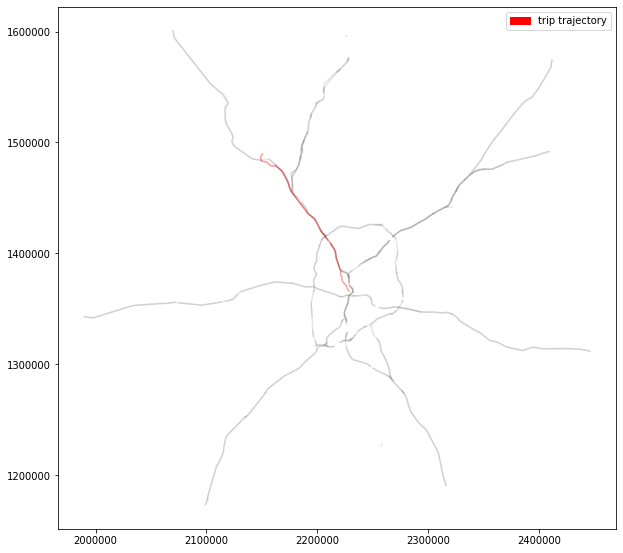

PATH #: 0
['65633', '14029', '80300', '80301', '11917', '12700', '14049', '12728', '72289', '72279', '12727', '12726', '25250', '12652', '33100', '83312', '83311', '83310', '83338', '83337', '83309', '83308', '83307', '83306', '83305', '83304', '83303', '83302', '83301', '83300', '83295', '83293', '83294', '83288', '9804', '13089', '17217', '10219', '14607', '80605', '10192', '10221', '80621', '8062', '8157', '80623', '8058', '8158', '80733', '8055', '15094', '80732', '19744', '19743', '19742', '80713', '19727', '19741', '80712', '80711', '80710', '19740', '19739', '19738', '80714', '13837', '25347', '19737', '80717', '20055', '20054', '19770', '20390', '20278', '20171', '19794', '66037', '38198', '66039', '38199', '20143', '20053', '64034', '20376', '78287', '20052', '20051', '20050', '20360', '20049', '20048', '20047', '20093']
seq
['82556_12728', '12728_72289', '72289_72279', '72279_12727', '12727_12726', '12726_25250', '25250_12652', '12652_33100', '33100_83312', '83312_83311', '83

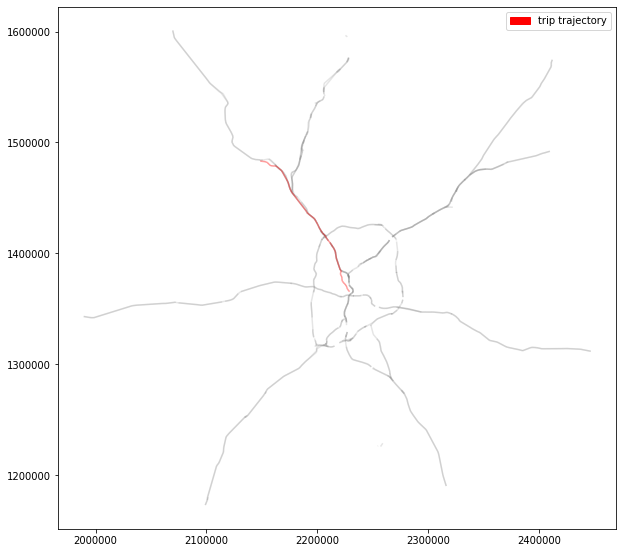

PATH #: 0
['82556', '12728', '72289', '72279', '12727', '12726', '25250', '12652', '33100', '83312', '83311', '83310', '83338', '83337', '83309', '83308', '83307', '83306', '83305', '83304', '83303', '83302', '83301', '83300', '83295', '83293', '83294', '83288', '9804', '13089', '17217', '10219', '14607', '80605', '10192', '10221', '80621', '8062', '8157', '80623', '8058', '8158', '80733', '8055', '15094', '80732', '19744', '19743', '19742', '80713', '19727', '19741', '80712', '80711', '80710', '19740', '19739', '19738', '80714', '13837', '25347', '19737', '80717', '20055', '20054', '19770', '20390', '20278', '20171', '19794', '66037', '38198', '66039', '38199', '20143', '20053', '64034', '20376', '78287', '20052', '20051', '20050', '20360', '20049', '20048', '20047', '20093']


In [12]:
print('**for each trip, find k-shortest paths**')
allRun(df_points, options, dict_settings)

Now we finished compute an example for strategy 1.


The code block below is: **Given arrival time at destination, solve latest departure time**

In [13]:
dict_settings = {'walk_speed': 2.0,  # people's walking speed 2 mph
                 'grid_size': 25000.0,  # for searching nearby links by grouping links to grids with width 25000 ft. for efficiency in searching
                 'ntp_dist_thresh': 5280.0,  # node to point (maximum distance access to network from origin/destination); (walking) distance threshold
                 'network': {'bike': dict_bike},  # dump in networks and modes
                 # strategy determines network link's direction.
                 # Strategy 1: Find earliest arrival given query time as departure time
                 # Strategy 2: Find latest departure time given query time as arrival time
                 'strategy': {'bike': 2},  # 1. find earliest arrival 2. find latest departure
                 'query_time': [8],  # departure time or arrival time of a trip, depends on the strategy
                 
                 'walk_thresh': {'bike': 1},  # walking threshold is 1 mile
                 'num_options': {'bike': 1},  # if set to 2, return 2-shortest paths
                 'plot_all': True,  # if True, plot results and save plots for all routes found
                 'one_by_one': False  # set time and strategy one by one
                 }

**for each trip, find k-shortest paths**
seq
['9496_9495', '9495_64222', '64222_9315', '9315_78042', '78042_78041', '78041_9396', '9396_9177', '9177_78069', '78069_9176', '9176_78066', '78066_14379', '14379_9175', '9175_65055', '65055_36414', '36414_19568', '19568_28087', '28087_28088', '28088_19617', '19617_78194', '78194_78196', '78196_19597', '19597_74476', '74476_20041']
results_route/200508_180552/4001880_1_1_0.PNG


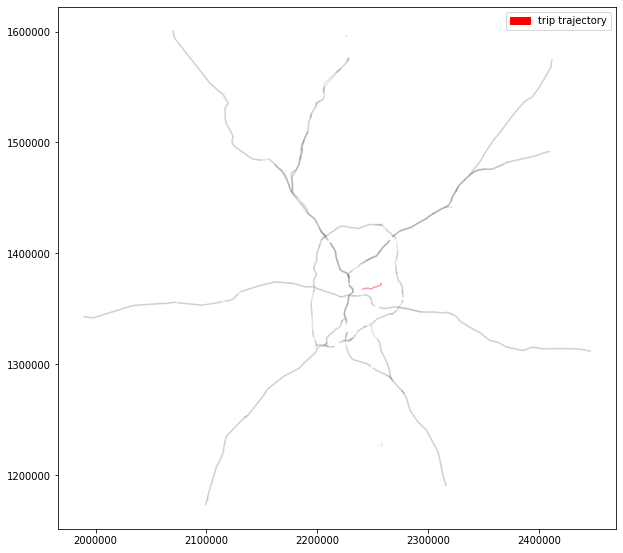

PATH #: 0
['9496', '9495', '64222', '9315', '78042', '78041', '9396', '9177', '78069', '9176', '78066', '14379', '9175', '65055', '36414', '19568', '28087', '28088', '19617', '78194', '78196', '19597', '74476', '20041', '40102']
seq
['9496_9495', '9495_64222', '64222_9315', '9315_78042', '78042_78041', '78041_9396', '9396_9177', '9177_78069']
results_route/200508_180552/4004837_1_5_0.PNG


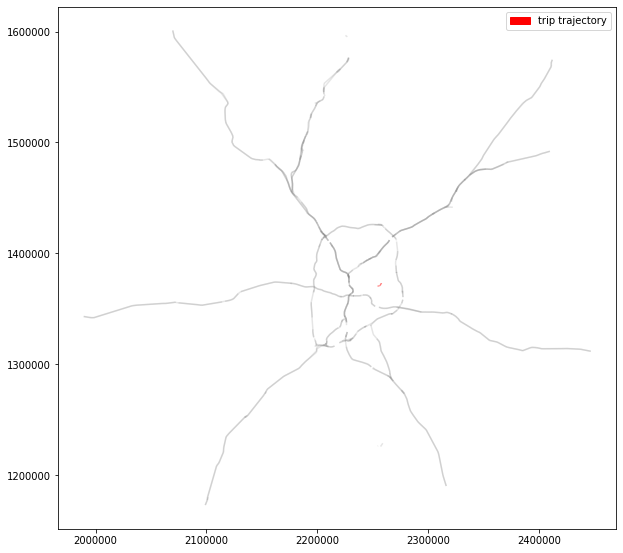

PATH #: 0
['9496', '9495', '64222', '9315', '78042', '78041', '9396', '9177', '78069', '9176']
seq
['9496_9497', '9497_37052', '37052_9393', '9393_9185', '9185_25443', '25443_9186', '9186_82126', '82126_9193', '9193_9330', '9330_25442', '25442_14922', '14922_78027', '78027_78028', '78028_9331', '9331_81911', '81911_9332', '9332_9333', '9333_9334', '9334_9335']
results_route/200508_180552/4007534_1_9_0.PNG


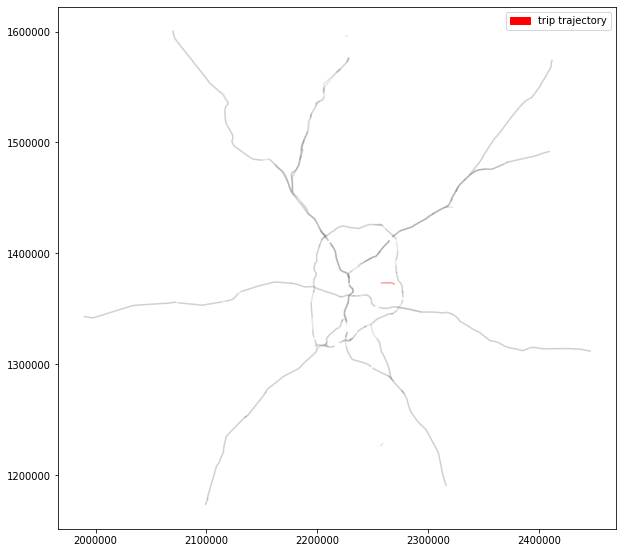

PATH #: 0
['9496', '9497', '37052', '9393', '9185', '25443', '9186', '82126', '9193', '9330', '25442', '14922', '78027', '78028', '9331', '81911', '9332', '9333', '9334', '9335', '9157']
seq
['65633_14029', '14029_80300', '80300_80301', '80301_11917', '11917_12700', '12700_14049', '14049_12728', '12728_72289', '72289_72279', '72279_12727', '12727_12726', '12726_25250', '25250_12652', '12652_33100', '33100_83312', '83312_83311', '83311_83310', '83310_83338', '83338_83337', '83337_83309', '83309_83308', '83308_83307', '83307_83306', '83306_83305', '83305_83304', '83304_83303', '83303_83302', '83302_83301', '83301_83300', '83300_83295', '83295_83293', '83293_83294', '83294_83288', '83288_9804', '9804_13089', '13089_17217', '17217_10219', '10219_14607', '14607_80605', '80605_10192', '10192_10221', '10221_80621', '80621_8062', '8062_8157', '8157_80623', '80623_8058', '8058_8158', '8158_80733', '80733_8055', '8055_15094', '15094_80732', '80732_19744', '19744_19743', '19743_19742', '19742_807

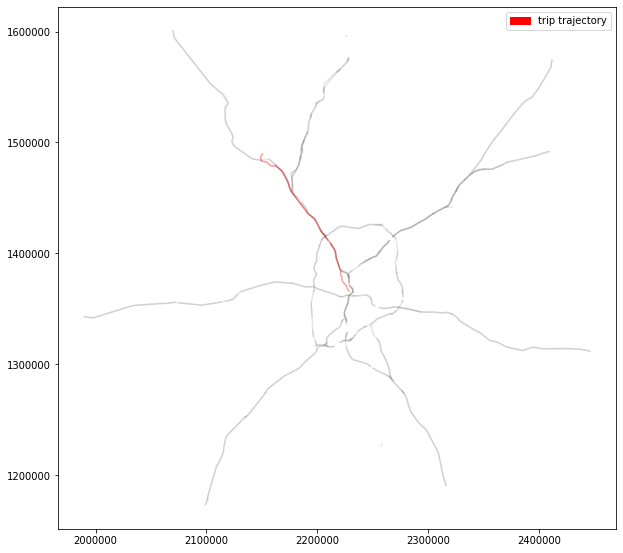

PATH #: 0
['65633', '14029', '80300', '80301', '11917', '12700', '14049', '12728', '72289', '72279', '12727', '12726', '25250', '12652', '33100', '83312', '83311', '83310', '83338', '83337', '83309', '83308', '83307', '83306', '83305', '83304', '83303', '83302', '83301', '83300', '83295', '83293', '83294', '83288', '9804', '13089', '17217', '10219', '14607', '80605', '10192', '10221', '80621', '8062', '8157', '80623', '8058', '8158', '80733', '8055', '15094', '80732', '19744', '19743', '19742', '80713', '19727', '19741', '80712', '80711', '80710', '19740', '19739', '19738', '80714', '13837', '25347', '19737', '80717', '20055', '20054', '19770', '20390', '20278', '20171', '19794', '66037', '38198', '66039', '38199', '20143', '20053', '64034', '20376', '78287', '20052', '20051', '20050', '20360', '20049', '20048', '20047', '20093']
seq
['82556_12728', '12728_72289', '72289_72279', '72279_12727', '12727_12726', '12726_25250', '25250_12652', '12652_33100', '33100_83312', '83312_83311', '83

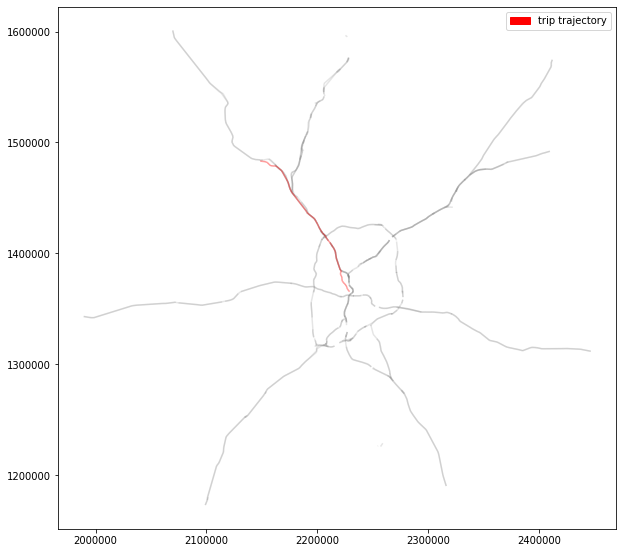

PATH #: 0
['82556', '12728', '72289', '72279', '12727', '12726', '25250', '12652', '33100', '83312', '83311', '83310', '83338', '83337', '83309', '83308', '83307', '83306', '83305', '83304', '83303', '83302', '83301', '83300', '83295', '83293', '83294', '83288', '9804', '13089', '17217', '10219', '14607', '80605', '10192', '10221', '80621', '8062', '8157', '80623', '8058', '8158', '80733', '8055', '15094', '80732', '19744', '19743', '19742', '80713', '19727', '19741', '80712', '80711', '80710', '19740', '19739', '19738', '80714', '13837', '25347', '19737', '80717', '20055', '20054', '19770', '20390', '20278', '20171', '19794', '66037', '38198', '66039', '38199', '20143', '20053', '64034', '20376', '78287', '20052', '20051', '20050', '20360', '20049', '20048', '20047', '20093']


In [14]:
print('**for each trip, find k-shortest paths**')
allRun(df_points, options, dict_settings)

# For Input Table with Temporal and Strategy Information

In [15]:
# the strategy settings and query time initial settings could be random value
dict_settings = {'walk_speed': 2.0,  # people's walking speed 2 mph
                 'grid_size': 25000.0,  # for searching nearby links by grouping links to grids with width 25000 ft. for efficiency in searching
                 'ntp_dist_thresh': 5280.0,  # node to point (maximum distance access to network from origin/destination); (walking) distance threshold
                 'network': {'bike': dict_bike},  # dump in networks and modes
                 # strategy determines network link's direction.
                 # Strategy 1: Find earliest arrival given query time as departure time
                 # Strategy 2: Find latest departure time given query time as arrival time
                 'strategy': {'bike': 2},  # 1. find earliest arrival 2. find latest departure
                 'query_time': [8],  # departure time or arrival time of a trip, depends on the strategy
                 
                 'walk_thresh': {'bike': 1},  # walking threshold is 1 mile
                 'num_options': {'bike': 1},  # if set to 2, return 2-shortest paths
                 'plot_all': True,  # if True, plot results and save plots for all routes found
                 'one_by_one': True  # set time and strategy one by one
                 }

Need to prepare sample data again for new inputs

In [16]:
print('** load trip data & prepare sample **')
sample_Prepared = False  # check prepared process
options = ['bike']

df_points = pd.DataFrame()
# Section 2: lOAD SAMPLE DATA; could have multiple csv sample files.
if dict_settings['one_by_one'] is False:
    if sample_Prepared:
        for samp_file in glob.glob(os.path.join('samples_out', '*.csv')):
            dfi = pd.read_csv(samp_file)
            dfi['sample'] = os.path.basename(samp_file).split('.csv')[0]
            df_points = df_points.append(dfi, ignore_index=True)
    else:
        for samp_file in glob.glob(os.path.join('samples_in', '*.csv')):
            df_points = df_points.append(samp_pre_process(samp_file, dict_settings), ignore_index=True)
else:
    if sample_Prepared:
        for samp_file in glob.glob(os.path.join('one_by_one_out', '*.csv')):
            dfi = pd.read_csv(samp_file)
            dfi['sample'] = os.path.basename(samp_file).split('.csv')[0]
            df_points = df_points.append(dfi, ignore_index=True)
    else:
        for samp_file in glob.glob(os.path.join('one_by_one_in', '*.csv')):
            df_points = df_points.append(samp_pre_process(samp_file, dict_settings), ignore_index=True)

** load trip data & prepare sample **


In [17]:
display(df_points)

,trip_id,ori_lat,ori_lon,dest_lat,dest_lon,ori_time,dest_time,strategy,geometry,ox,oy,ox_sq,oy_sq,o_node,o_t,o_d,dx,dy,dx_sq,dy_sq,d_node,d_t,d_d
0,4001880_1_1,33.774524,-84.295376,33.757411,-84.352757,7,11,1,POINT (2240025.346 1366840.737),2.257473e+06,1.373041e+06,90.0,55.0,9496,0.013159,0.026318,2.240025e+06,1.366841e+06,90.0,55.0,40102,0.011866,0.023733
1,4004837_1_5,33.774524,-84.295376,33.765113,-84.313054,7,11,1,POINT (2252096.297 1369623.749),2.257473e+06,1.373041e+06,90.0,55.0,9496,0.013159,0.026318,2.252096e+06,1.369624e+06,90.0,55.0,9176,0.016593,0.033185
2,4007534_1_9,33.774524,-84.295376,33.772597,-84.251919,7,11,2,POINT (2270677.321 1372326.223),2.257473e+06,1.373041e+06,90.0,55.0,9496,0.013159,0.026318,2.270677e+06,1.372326e+06,91.0,55.0,9157,0.074155,0.148310


**for each trip, find k-shortest paths**
seq
['9496_9495', '9495_64222', '64222_9315', '9315_78042', '78042_78041', '78041_9396', '9396_9177', '9177_78069', '78069_9176', '9176_78066', '78066_14379', '14379_9175', '9175_65055', '65055_36414', '36414_19568', '19568_28087', '28087_28088', '28088_19617', '19617_78194', '78194_78196', '78196_19597', '19597_74476', '74476_20041']
results_route/200508_180557/4001880_1_1_0.PNG


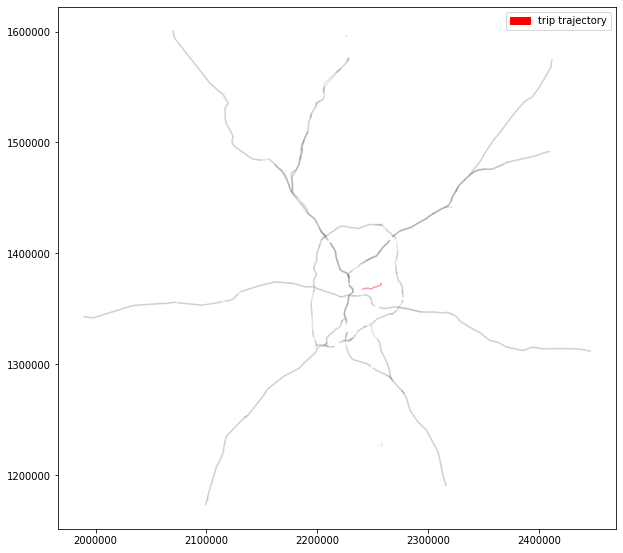

PATH #: 0
['9496', '9495', '64222', '9315', '78042', '78041', '9396', '9177', '78069', '9176', '78066', '14379', '9175', '65055', '36414', '19568', '28087', '28088', '19617', '78194', '78196', '19597', '74476', '20041', '40102']
seq
['9496_9495', '9495_64222', '64222_9315', '9315_78042', '78042_78041', '78041_9396', '9396_9177', '9177_78069']
results_route/200508_180557/4004837_1_5_0.PNG


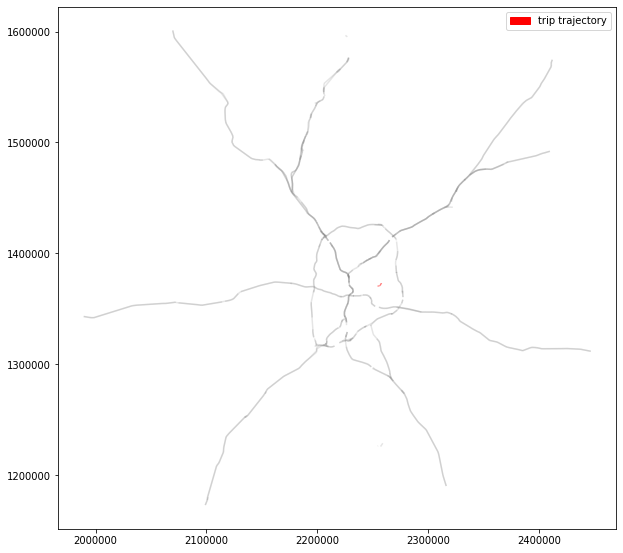

PATH #: 0
['9496', '9495', '64222', '9315', '78042', '78041', '9396', '9177', '78069', '9176']
seq
['9496_9497', '9497_37052', '37052_9393', '9393_9185', '9185_25443', '25443_9186', '9186_82126', '82126_9193', '9193_9330', '9330_25442', '25442_14922', '14922_78027', '78027_78028', '78028_9331', '9331_81911', '81911_9332', '9332_9333', '9333_9334', '9334_9335']
results_route/200508_180557/4007534_1_9_0.PNG


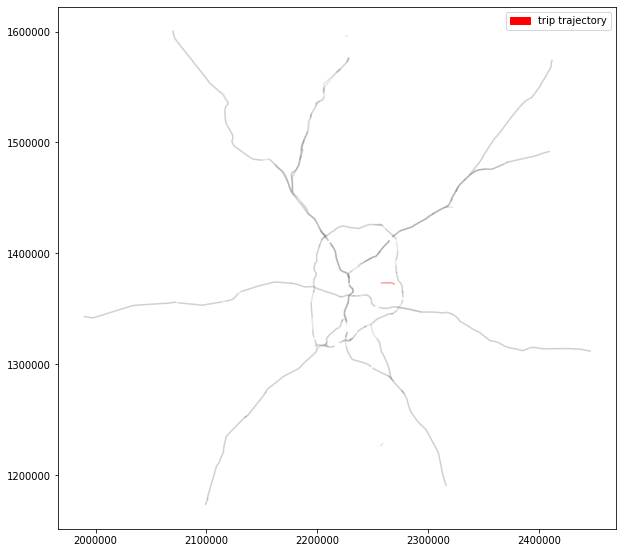

PATH #: 0
['9496', '9497', '37052', '9393', '9185', '25443', '9186', '82126', '9193', '9330', '25442', '14922', '78027', '78028', '9331', '81911', '9332', '9333', '9334', '9335', '9157']


In [18]:
print('**for each trip, find k-shortest paths**')
allRun(df_points, options, dict_settings)

**You can see path results (represented using network's node id) in directory:**

***BikeSim/build_graph/results***
### columns defintion of the output results
Every row correpsonds to a link<br>
**A**: origin node id<br>
**B**: destination node id<br>
**dist**: distances<br>
**mode**: mode of transportation (e.g., walk, bike, etc.)<br>
**strategy**: chosen strategy<br>
**route_num**: the k number of k-shortest routes return for each link<br>
**sequence**: the trip segment number in a sequence of trips<br>
**time**: time it takes to travel through the link<br>
**timeStamp**: accumulative time of the current trip (in hours)<br>
**trip_id**: trip id (from the trip query)<br>
**route**: name of the link (from the ABM link file)<br>

### For graph outputs

***BikeSim/build_graph/results_routes***

naming rule:

{trip_id}_{(k-1)th route}.PNG

e.g.,

{4001880_1_1}_{0}.PNG

# TODO:
1. Edit bike speed considering temporal-spatial differences.

Bicycle speed depends on the slope, weather condition, rider's physical, etc. Currently, speed is build as a constant speed (15mph) after loading the network. What you can do is to load attributes like slopes, road condition to the shapefile. After loading those shapefiles, you can use them to estimate speed in whatever expression you want, instead of using a default constant speed (e.g., 15 mph) in current implementation.